In [1]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt

In [24]:
random.seed(43)

In [2]:
data = np.genfromtxt('datasets/clustering/data.csv', delimiter = ",")

In [3]:
data.shape

(10000, 6)

In [6]:
data[2]

array([  2.06831393,   9.22912648,  -8.51317635,  -7.24032249,
       -10.06557096,   5.5900909 ])

In [9]:
np.max(data)

12.070627597167613

In [10]:
np.min(data)

-12.390704798867546

In [11]:
def calculate_distances(training_instances, query_instances):
    return np.sqrt(np.sum(np.square(query_instances - training_instances), axis = 1))

In [12]:
# Initializing k number of centroids by selecting at random from the data
def generate_centroids(training_instances, k):
    ''' This function accepts as arguments, training data and k which is an integer, which determines
        how many centroids to be selected.
        
        returns randomly selected k training data points as initial centroids'''
    
    indices = random.sample(range(len(training_instances)), k=k)
    centroids = training_instances[indices]
    return centroids

In [13]:
def assign_centroids(training_instances, centroids):
    '''This function accepts as arguments, feature data and initially selected k number of centroids
       calculates the distance between each feature data and the centroids, assigns the nearest data 
       points to the respective centroids
       
       returns a 1D Numpy array containing indices of the centroids assigned to each feature data poin
       '''
    
    centroid_indices = []
    for data in training_instances:
        centroid_indices.append(np.argmin(calculate_distances(centroids, data)))
    return np.array(centroid_indices)

In [14]:
def move_centroids(training_instances, centroid_indices, centroids):
    '''This function accepts as arguments, feature data, centroid indices (obtained from assign centroids function)
       and centroids
       
       returns the new centroids which is equal to the mean value of the feature data points assigned to respective centroids
       '''
    new_centroids = [training_instances[centroid_indices == i].mean(axis = 0) for i in range(len(centroids))]
    return np.array(new_centroids)

In [15]:
def calculate_cost(training_instances, centroid_indices, centroids):
    '''Accepts as argument, feature data, centroid indices and centroids
       
       returns the distortion cost value'''
    
    cost = np.mean(np.sum(np.square(centroids[centroid_indices] - training_instances), axis = 1))
    return cost

In [16]:
def restart_KMeans(training_instances, no_of_centroids, no_iterations = 10, no_restarts = 10):
    '''Accepts as arguments, feature data, number of centroids to be initialized at start,
       for how many iterations we need to assign and move the centroids and how many times
       we can restart the above process (Run KMeans)
       
       returns the best cost and related centroids for each restart of KMeans
       '''
    
    bestcost = float('inf')
    for restart_ind in range(no_restarts):
        centroids = generate_centroids(training_instances, no_of_centroids)
        for iteration in range(no_iterations):
            centroid_indices = assign_centroids(training_instances, centroids)
            centroids = move_centroids(training_instances, centroid_indices, centroids)
        cost = calculate_cost(training_instances, centroid_indices, centroids)
        if cost < bestcost:
            bestcost = cost
            bestcentroids = centroids.copy()
    return bestcost, bestcentroids

In [17]:
def visualize(no_of_clusters, costs):
    '''This function takes as arguments number of clusters and costs as python lists
       plots the graph with number of clusters on X-axis and cost value on Y-axis
       '''
    
    plt.plot(no_of_clusters, costs)
    plt.title("Cost Vs No_of_Centroids")
    plt.xlabel("No_of_Centroids(K)")
    plt.ylabel("Distortion Function value(cost)")
    plt.grid(True)

K = 1, Cost = 128.18845806187915
K = 2, Cost = 40.008753227335646
K = 3, Cost = 18.07608582263684
K = 4, Cost = 2.922150566084583
K = 5, Cost = 2.8384365879394435
K = 6, Cost = 2.7600394592917206


c:\python3.7.8\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys
c:\python3.7.8\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


K = 7, Cost = 2.679666543753014
Total time taken: 61.421875 seconds


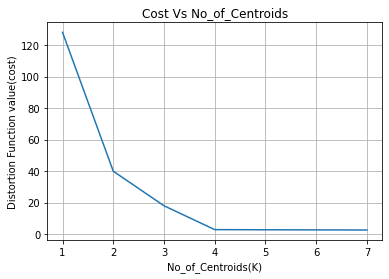

In [19]:
# Using the data as it is
no_of_clusters = [1,2,3,4,5,6,7]
costs = []
start_time = time.process_time()
data = np.genfromtxt('datasets/clustering/data.csv', delimiter = ",")
for k in no_of_clusters:
    cost, centroid = restart_KMeans(data, k, 10, 10)
    costs.append(cost)
    print("K = {}, Cost = {}".format(k, cost))
end_time = time.process_time()
print("Total time taken: {} seconds".format(end_time - start_time))
visualize(no_of_clusters, costs)

In [22]:
centroid.shape

(7, 6)

K = 1, Cost = 0.3888573475586305
K = 2, Cost = 0.17339376706981183
K = 3, Cost = 0.07959917043818183
K = 4, Cost = 0.01734776072961027
K = 5, Cost = 0.016345400599907668
K = 6, Cost = 0.015360793262675974
K = 7, Cost = 0.01436214581855193
Total time taken: 59.328125 seconds


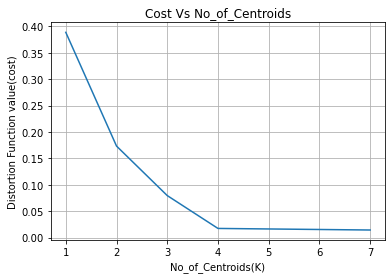

In [23]:
# Normalizing the data to have all the values between 0 and 1. 
#This will ensure features with large variance are not having any pressing effect on KNN

costs = []
start_time = time.process_time()
data = np.genfromtxt('datasets/clustering/data.csv', delimiter = ",")
data = ( data - data.min(axis = 0) ) / ( data.max(axis = 0) - data.min(axis = 0) )
for k in no_of_clusters:
    cost, centroid = restart_KMeans(data, k, 10, 10)
    costs.append(cost)
    print("K = {}, Cost = {}".format(k, cost))
end_time = time.process_time()
print("Total time taken: {} seconds".format(end_time - start_time))
visualize(no_of_clusters, costs)